In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://logowik.com/content/uploads/images/kahramanmaras-sutcu-imam-universitesi5139.jpg", width=400, height=400) 

  
  
  # KSÜ BİLGİSAYAR MÜHENDİSLİĞİ
 # 2023-2024 GÜZ DÖNEMİ
# VERİ MADENCİLİĞİ FİNAL PROJESİ
**------------------------------------------------------------------------------------------------**

## İÇİNDEKİLER

### 1- Problemin Belirlenmesi ve Uygun Veri Setinin Temini

### 2- Veri Keşfi 
**1.1-kaggle.com**

### 3- Hazırlık
**3.1-Veri ön işleme**

### 4- Veri Görselleştirme

### 5- Modelleme
**5.1- RFM Segmentasyonu**

**5.1.1- RFM değerlerinin görselleştirilmesi**

### 6- K-Means Kümeleme Algoritması
**6.1- Sonuç ve Yorum**

### 7- Mean-Shift Kümeleme Algoritması
**7.1- Sonuç ve yorum**

### 8- Hiyerarşik Kümeleme Algoritması
**8.1- Sonuç ve yorum**

### 9- Kaynakça










  
  
  
-

## 1- Problemin Seçilmesi ve Uygun Veri Setinin Temin Edilmesi

Müşterilerin yaşlarına göre harcama alışkanlıklarının incelenmesi ve değerlendirmeler sonucunda kampanya, reklam çalışmalarının müşterilerin yaşlarına göre şekillenmesini sağlamak.

----

**Aşağıdaki kütüphaneleri kullanacağız:**

**Numpy:** Sayısal hesaplama kütüphanesi.

**Pandas:** Veri işleme ve analiz kütüphanesi.

**Matplotlib:** Veri görselleştirme kütüphanesi.

**Seaborn:** İstatistiksel veri görselleştirme kütüphanesi.

**Scipy:** Bilimsel hesaplama için kapsamlı sayısal algoritma ve araç kütüphanesi.

**Datetime:** Tarih ve zaman işlemleri kütüphanesi.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 2- VERİ KEŞFİ 

Bu uygulamada Kaggle üzerinden public olarak sunulan ‘Customer Transactions’ adlı veri seti kullanılacaktır.

In [4]:
df = pd.read_csv('Customer.csv')

In [5]:
df

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market
49996,800560,Anna,Allen,F,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market


-

## 3- HAZIRLIK 
### 3.1-Veri Ön İşleme

Özniteliklerin daha anlaşılabilir olması için **Türkçe** hale getirilmesi.

In [6]:
df.rename(columns={'Customer ID' : 'Musteri_ID',
                   'Name':'Isim',
                   'Surname':'Soyisim',
                   'Gender':'Cinsiyet',
                   'Birthdate':'Dogum_Tarihi',
                   'Transaction Amount':'Yapilan_Harcama',
                   'Date':'Harcama_Tarihi',
                   'Merchant Name':'Satici',
                   'Category':'Kategori'}, inplace=True)


In [7]:
df #Veri seti ön inceleme

,Musteri_ID,Isim,Soyisim,Cinsiyet,Dogum_Tarihi,Yapilan_Harcama,Harcama_Tarihi,Satici,Kategori
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics
...,...,...,...,...,...,...,...,...,...
49995,891845,Christine,Leach,F,1997-10-21,108.74,2023-08-30,Alexander Ltd,Market
49996,800560,Anna,Allen,F,1999-10-21,133.66,2023-05-03,Knapp-Calhoun,Cosmetic
49997,133285,Nicole,Franklin,M,1979-10-26,464.29,2023-02-12,"Cantrell, Haynes and Ballard",Market
49998,616122,Maria,Keller,M,1981-10-25,472.57,2023-03-25,"Wilson, Jackson and Beard",Market


NULL değere sahip veri miktarının belirlenmesi.

In [9]:
df.isnull().sum()

Musteri_ID            0
Isim                  0
Soyisim               0
Cinsiyet           5047
Dogum_Tarihi          0
Yapilan_Harcama       0
Harcama_Tarihi        0
Satici                0
Kategori              0
dtype: int64

NULL verilerin silinmesi.

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

Musteri_ID         0
Isim               0
Soyisim            0
Cinsiyet           0
Dogum_Tarihi       0
Yapilan_Harcama    0
Harcama_Tarihi     0
Satici             0
Kategori           0
dtype: int64

---

Tekrar eden verilerin kontrolünün yapılması

In [12]:
duplicates = pd.DataFrame({'HasDuplicates': [df.duplicated().any()]})
duplicates

,HasDuplicates
0,False


Tekrar eden veri bulunmamaktadır.

----

In [13]:
df.shape

(44953, 9)

---
---
**Doğum Tarihi** özniteliğinden **Yaş** özniteliğinin elde edilmesi.

In [16]:
df.loc[:,('Dogum_Tarihi')] = pd.to_datetime(df.loc[:,('Dogum_Tarihi')]) # Tarih formatına dönüşüm
df.loc[:,('Yas')] = df.loc[:,('Dogum_Tarihi')].apply(lambda x: (datetime.now().year - x.year)) # Hesaplama

print(df['Yas'])

0        22
2        43
3        47
4        73
5        23
         ..
49995    27
49996    25
49997    45
49998    43
49999    66
Name: Yas, Length: 44953, dtype: int64


In [17]:
df.head()

,Musteri_ID,Isim,Soyisim,Cinsiyet,Dogum_Tarihi,Yapilan_Harcama,Harcama_Tarihi,Satici,Kategori,Yas
0,752858,Sean,Rodriguez,F,2002-10-20 00:00:00,35.47,2023-04-03,Smith-Russell,Cosmetic,22
2,305449,Jacob,Williams,M,1981-10-25 00:00:00,115.97,2023-09-20,Steele Inc,Clothing,43
3,988259,Nathan,Snyder,M,1977-10-26 00:00:00,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,47
4,764762,Crystal,Knapp,F,1951-11-02 00:00:00,62.21,2023-06-13,Palmer-Hinton,Electronics,73
5,576539,Monica,Bartlett,F,2001-10-20 00:00:00,99.14,2023-08-24,"Tran, Torres and Joyce",Cosmetic,23


In [18]:
df.info() #Kontrol

<class 'pandas.core.frame.DataFrame'>
Index: 44953 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Musteri_ID       44953 non-null  int64  
 1   Isim             44953 non-null  object 
 2   Soyisim          44953 non-null  object 
 3   Cinsiyet         44953 non-null  object 
 4   Dogum_Tarihi     44953 non-null  object 
 5   Yapilan_Harcama  44953 non-null  float64
 6   Harcama_Tarihi   44953 non-null  object 
 7   Satici           44953 non-null  object 
 8   Kategori         44953 non-null  object 
 9   Yas              44953 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 3.8+ MB


---
Ay bazında işlem yoğunluklarının incelenmesi için **Harcama Tarihi** özniteliğinden **İşlem Tarihi** adlı ayları gösteren özniteliğinin elde edilmesi.

In [20]:
df.loc[:,'Ay']=df.loc[:,'Harcama_Tarihi'].str.slice(5,7)
df.loc[:,'Ay']=df.loc[:,'Ay'].astype('int64')
df.head()

,Musteri_ID,Isim,Soyisim,Cinsiyet,Dogum_Tarihi,Yapilan_Harcama,Harcama_Tarihi,Satici,Kategori,Yas,Ay
0,752858,Sean,Rodriguez,F,2002-10-20 00:00:00,35.47,2023-04-03,Smith-Russell,Cosmetic,22,4
2,305449,Jacob,Williams,M,1981-10-25 00:00:00,115.97,2023-09-20,Steele Inc,Clothing,43,9
3,988259,Nathan,Snyder,M,1977-10-26 00:00:00,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,47,1
4,764762,Crystal,Knapp,F,1951-11-02 00:00:00,62.21,2023-06-13,Palmer-Hinton,Electronics,73,6
5,576539,Monica,Bartlett,F,2001-10-20 00:00:00,99.14,2023-08-24,"Tran, Torres and Joyce",Cosmetic,23,8


Cinsiyet sütunun F=1, M=0 değişiminin yapılması ve veri tipinin değiştirilmesi,

Ay verisinin veri tipinin değiştirilmesi,

(Sonradan dahil edilmiştir.)Oluşturulacak modelin daha anlamlı hale gelmesi için Ziyaret sütunun eklenmesi,

işlemleri yapılmıştır.


In [24]:
df.loc[:,'Cinsiyet'] = df.loc[:,'Cinsiyet'].replace({'F': 1, 'M': 0})
df.loc[:,'Cinsiyet'] = pd.to_numeric(df['Cinsiyet'], errors='coerce', downcast='integer')
df.loc[:,'Ay'] = pd.to_numeric(df['Ay'], errors='coerce', downcast='integer')
df.loc[:,('Ziyaret')] = np.random.randint(2, 25, size=len(df))

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44953 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Musteri_ID       44953 non-null  int64   
 1   Isim             44953 non-null  object  
 2   Soyisim          44953 non-null  object  
 3   Cinsiyet         44953 non-null  int64   
 4   Dogum_Tarihi     44953 non-null  object  
 5   Yapilan_Harcama  44953 non-null  float64 
 6   Harcama_Tarihi   44953 non-null  object  
 7   Satici           44953 non-null  object  
 8   Kategori         44953 non-null  object  
 9   Yas              44953 non-null  int64   
 10  Ay               44953 non-null  int8    
 11  Ziyaret          44953 non-null  int32   
 12  Age_Group        44168 non-null  category
dtypes: category(1), float64(1), int32(1), int64(3), int8(1), object(6)
memory usage: 4.0+ MB


In [52]:
df.loc[:,'Ay'] = pd.to_numeric(df.loc[:,'Ay'], errors='coerce', downcast='integer')

---

Sayısal özniteliklerin istatistiksel sonuçları incelenmesi.

In [53]:
df.describe()

,Musteri_ID,Cinsiyet,Yapilan_Harcama,Yas,Ay,Ziyaret
count,44953.000000,44953.000000,44953.000000,44953.000000,44953.000000,44953.000000
mean,500291.017307,0.505261,442.996086,47.534736,5.250729,12.996841
std,288276.249030,0.499978,632.486149,16.822202,2.730848,6.619027
min,29.000000,0.000000,5.010000,19.000000,1.000000,2.000000
25%,251207.000000,0.000000,79.200000,33.000000,3.000000,7.000000
50%,499534.000000,1.000000,182.360000,48.000000,5.000000,13.000000
75%,749999.000000,1.000000,471.820000,62.000000,8.000000,19.000000
max,999997.000000,1.000000,2999.880000,76.000000,10.000000,24.000000


---

# 4- Veri Görselleştirme

Müşterilerin **Kadın(F)** ve **Erkek(M)** sayılarını gösteren grafiğin çizilmesi.**(F=1, M=0)**

In [33]:
contingency=pd.crosstab(df['Kategori'],df['Cinsiyet'])
contingency

Cinsiyet,0,1
Kategori,,
Clothing,3738,3663
Cosmetic,3616,3824
Electronics,3740,3794
Market,3750,3738
Restaurant,3694,3833
Travel,3702,3861


Harcamaların aylara göre ortalamalarını gösteren tablo ve grafiklerin oluşturulması.

In [34]:
contingency=pd.crosstab(df['Kategori'],df['Ay'])
contingency

Ay,1,2,3,4,5,6,7,8,9,10
Kategori,,,,,,,,,,
Clothing,844,694,809,761,830,755,801,801,746,360
Cosmetic,835,732,817,745,790,768,787,812,784,370
Electronics,803,755,824,835,823,822,771,803,754,344
Market,831,729,764,721,835,785,844,806,788,385
Restaurant,807,724,850,729,845,805,848,801,782,336
Travel,789,724,850,789,823,761,852,829,790,356


In [37]:
monthly_avg_expenses = df.groupby('Ay')['Yapilan_Harcama'].mean().reset_index()
print(monthly_avg_expenses)


   Ay  Yapilan_Harcama
0   1       433.079929
1   2       440.987744
2   3       441.372243
3   4       453.995897
4   5       447.473134
5   6       430.127336
6   7       456.799078
7   8       442.463495
8   9       443.581019
9  10       436.260149


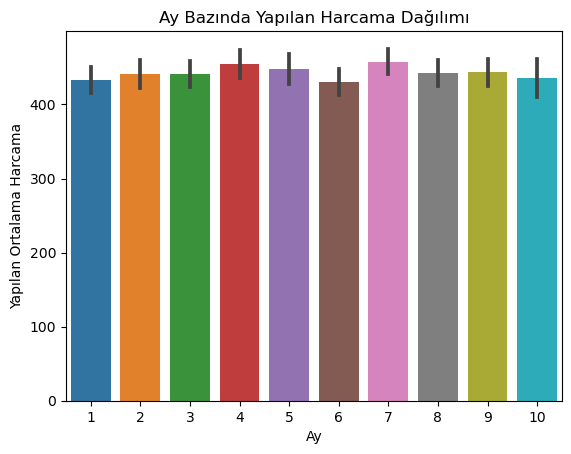

In [55]:
# Veri çerçevesindeki Ay ve Yapilan_Harcama sütunlarını kullanma
sns.barplot(x='Ay', y='Yapilan_Harcama', data=df)

# Grafiği düzenleme
plt.title('Ay Bazında Yapılan Harcama Dağılımı')
plt.xlabel('Ay')
plt.ylabel('Yapılan Ortalama Harcama')

# Grafiği gösterme
plt.show()


---

Kategorilere göre müşteri sayılarını gösteren tablonun çizilmesi.

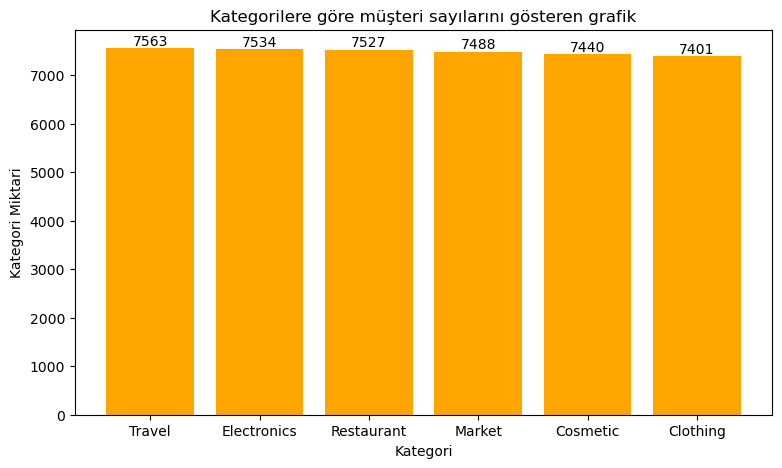

In [36]:
Kategori =df['Kategori'].value_counts()

plt.figure(figsize=(9,5))
bars = plt.bar(Kategori.index, Kategori.values, color='orange')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')
    
plt.ylabel('Kategori Miktari')
plt.xlabel('Kategori')
plt.title('Kategorilere göre müşteri sayılarını gösteren grafik')
plt.show()

Yaş gruplarına göre yapılan harcamaların istatistik verilerini gösteren tablo ve grafiğin oluşturulması.

In [40]:
# Yaş değerlerini belirtilen aralıklara göre gruplayıp "Age_Group" adlı yeni bir sütuna ekleme
bins = [19, 30, 40, 50, 60, 70, 76]
labels = ['19-30', '31-40', '41-50', '51-60', '61-70', '71-76']
df.loc[:,'Age_Group'] = pd.cut(df['Yas'], bins=bins, labels=labels, right=False)


age_summary = df.groupby('Age_Group')['Yapilan_Harcama'].describe()
print(age_summary)


            count        mean         std   min      25%      50%       75%  \
Age_Group                                                                     
19-30      8652.0  439.107255  622.355678  5.12  80.0575  187.455  471.7500   
31-40      7603.0  438.927501  629.435470  5.28  77.2900  180.260  469.5050   
41-50      7673.0  442.153435  635.189396  5.32  79.2800  181.220  466.7400   
51-60      7694.0  454.150182  636.719202  5.16  81.6925  185.205  485.3550   
61-70      7840.0  436.638736  631.350858  5.01  78.5300  179.475  460.2200   
71-76      4706.0  454.074998  649.556107  5.41  77.5750  179.775  487.4725   

               max  
Age_Group           
19-30      2997.81  
31-40      2999.22  
41-50      2998.48  
51-60      2997.11  
61-70      2999.88  
71-76      2994.22  


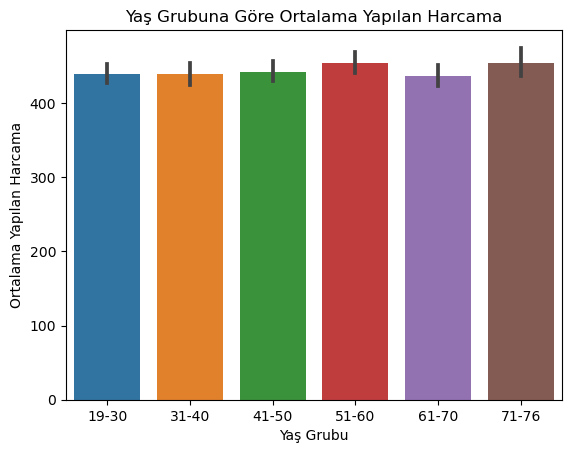

In [41]:
sns.barplot(x='Age_Group', y='Yapilan_Harcama', data=df, estimator=np.mean)
plt.title('Yaş Grubuna Göre Ortalama Yapılan Harcama')
plt.xlabel('Yaş Grubu')
plt.ylabel('Ortalama Yapılan Harcama')
plt.show()


---
Kadın müşterilerin kategorilere göre dağılımlarını gösteren grafiğin çizilmesi.

Text(0.5, 1.0, 'Kadın Müşterilerin Kategorileri')

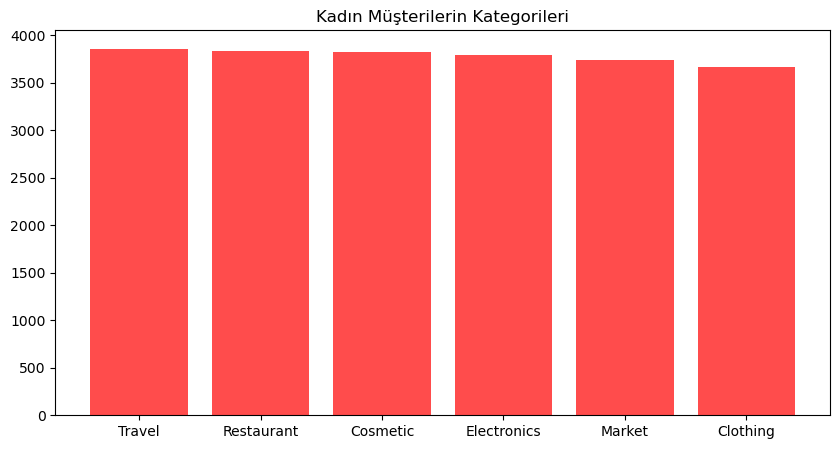

In [42]:
condition=df[df['Cinsiyet']==1]

females_count = condition['Kategori'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

axes.bar(females_count.index, females_count.values, color='r', alpha=0.7)
axes.set_title('Kadın Müşterilerin Kategorileri')

---

Erkek müşterilerin kategorilere göre dağılımlarını gösteren grafiğin çizilmesi.

Text(0.5, 1.0, 'Erkek Müşterilerin Kategorileri')

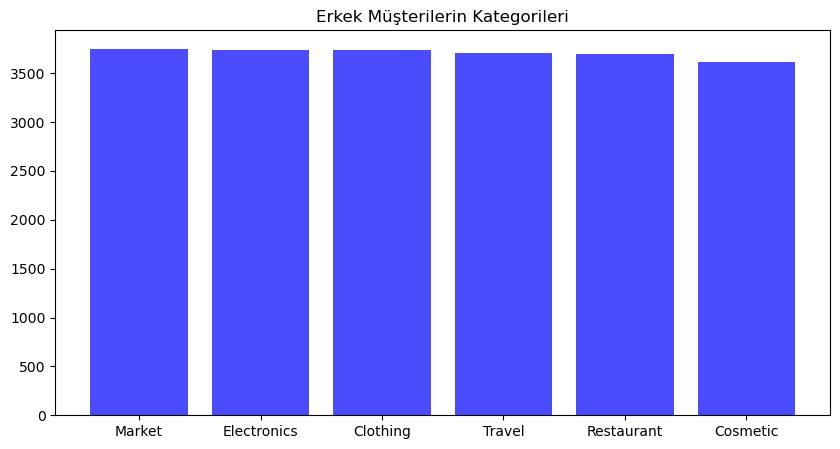

In [43]:
condition_2=df[df['Cinsiyet']==0]

males_count = condition_2['Kategori'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

axes.bar(males_count.index, males_count.values, color='b', alpha=0.7)
axes.set_title('Erkek Müşterilerin Kategorileri')

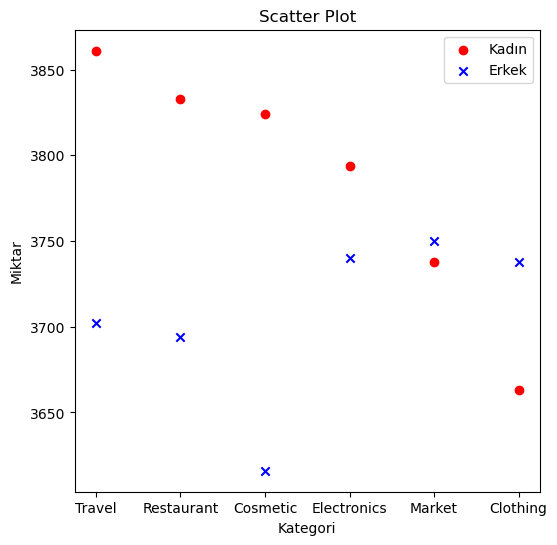

In [44]:
condition=df[df['Cinsiyet']==1]

females_count = condition['Kategori'].value_counts()

condition_2=df[df['Cinsiyet']==0]

males_count = condition_2['Kategori'].value_counts()

# Create scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(females_count.index, females_count.values, color='r', label='Kadın', marker='o')
plt.scatter(males_count.index, males_count.values, color='b', label='Erkek', marker='x')
plt.title('Scatter Plot')
plt.xlabel('Kategori')
plt.ylabel('Miktar')
plt.legend()

# Show the plot
plt.show()


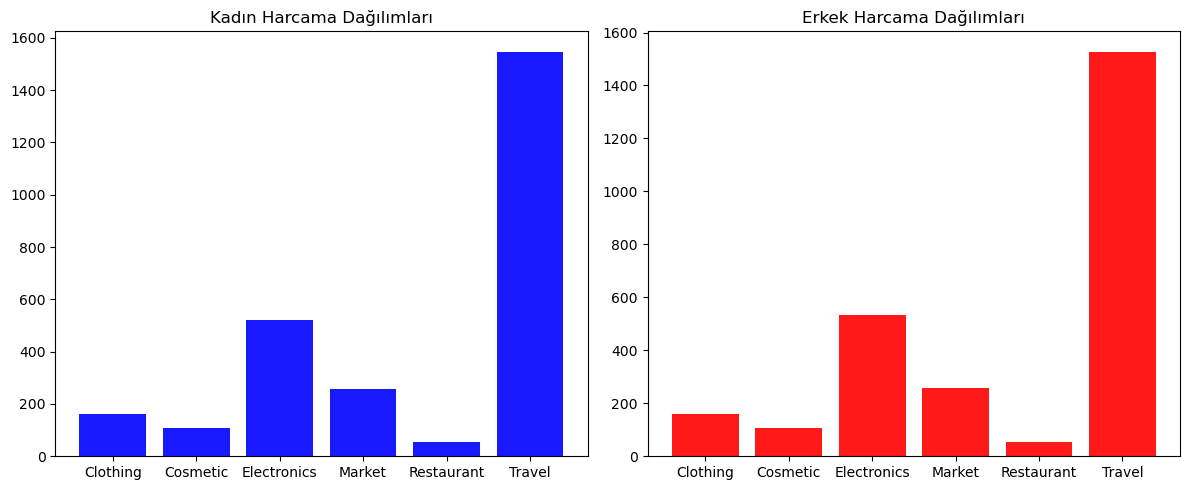

In [45]:
F=condition.groupby('Kategori')['Yapilan_Harcama'].mean()
M=condition_2.groupby('Kategori')['Yapilan_Harcama'].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].bar(F.index, F.values, color='b', alpha=0.9)
axes[0].set_title('Kadın Harcama Dağılımları')

axes[1].bar(M.index, M.values, color='r', alpha=0.9)
axes[1].set_title('Erkek Harcama Dağılımları')

plt.tight_layout()


plt.show()

In [46]:
print(df.columns)

Index(['Musteri_ID', 'Isim', 'Soyisim', 'Cinsiyet', 'Dogum_Tarihi',
       'Yapilan_Harcama', 'Harcama_Tarihi', 'Satici', 'Kategori', 'Yas', 'Ay',
       'Ziyaret', 'Age_Group'],
      dtype='object')


**Yapılan Harcama** özniteliğinin **Histogram** grafiğinde gösterimi.

<Axes: xlabel='Yapilan_Harcama', ylabel='Count'>

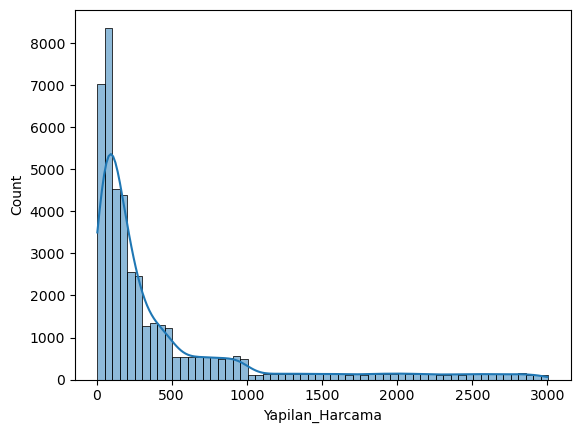

In [47]:
#data = df.rename(columns={"Yaş": "Yas", "Yapılan Harcama": "Yapilan Harcama"})
sns.histplot(x = "Yapilan_Harcama" , data = df, binwidth = 50, kde = True )

<Axes: xlabel='Yapilan_Harcama', ylabel='Count'>

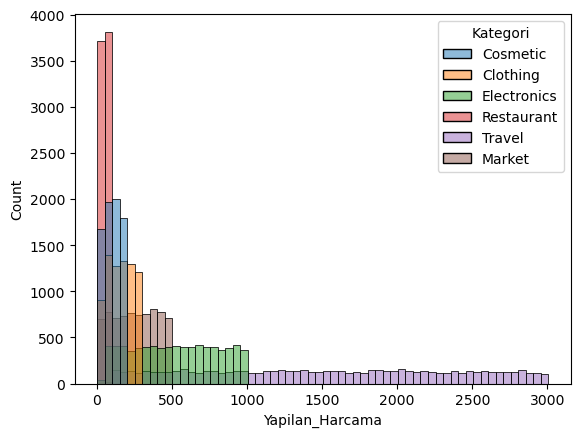

In [57]:
sns.histplot(x = "Yapilan_Harcama" , data = df, binwidth = 50, hue = "Kategori" )

---

# 5- Modelleme

---------
## 5.1- RFM Segmentasyonu

RFM (Recency, Frequency, Monetary) segmentasyonu bu üç ana kriter temelinde sınıflandırmak için kullanılan bir analiz yöntemidir.

**Recency:** Bir müşterinin en son satın alım yaptığı dönemden bu yana geçen süreyi ifade eder. Gün bazlı bir inceleme yapılıyorsa, bir müşterinin recency değerinin 1 olması, 1 gün önce alışveriş yaptığını gösterir.

**Frequency:** Müşterinin yaptığı toplam işlem sayısı, yani satın alma sıklığıdır.

**Monetary:** Müşterinin harcama yaptığı toplam tutar, miktar olarak hesaplanır.

In [58]:
column_types = df.dtypes
print(column_types)

Musteri_ID            int64
Isim                 object
Soyisim              object
Cinsiyet              int64
Dogum_Tarihi         object
Yapilan_Harcama     float64
Harcama_Tarihi       object
Satici               object
Kategori             object
Yas                   int64
Ay                     int8
Ziyaret               int32
Age_Group          category
dtype: object


In [60]:
from sklearn.cluster import KMeans
import datetime as dt

#Toplam harcama hesabı
df.loc[:,'Toplam_Harcama'] = df.loc[:,'Yapilan_Harcama']*df.loc[:,'Ziyaret']

#Harcama tarihi veri tipi değiştirme işlemi
df.loc[:, 'Harcama_Tarihi'] = pd.to_datetime(df.loc[:, 'Harcama_Tarihi'])

#Referans tarih
today = dt.datetime(2024,1,8)
print(today)

#sıfır kontrolü
df = df[df['Toplam_Harcama'] > 0]


2024-01-08 00:00:00


In [61]:
# İlk 5000 örneği seç
df_first_1500 = df.head(1500)

# Monetary ve Recency değerlerinin hesaplanması
data_x = df_first_1500.groupby('Yas').agg({'Toplam_Harcama': lambda x: x.sum(),
                                            'Harcama_Tarihi': lambda x: (today - x.max()).days})
 
data_y = df_first_1500.groupby(['Yas', 'Ziyaret']).agg({'Toplam_Harcama': lambda x: x.sum()})

# Toplam_Harcama sütununun kaç kez geçtiğini sayma işlemi
data_z = data_y.groupby('Yas').agg({'Toplam_Harcama': lambda x: len(x)})

# RFM tablosu
rfm_table = pd.merge(data_x, data_z, on='Yas')

# Sütun isimlerini belirliyoruz.
rfm_table.rename(columns={'Harcama_Tarihi': 'Recency',
                          'Toplam_Harcama_y': 'Frequency',
                          'Toplam_Harcama_x': 'Monetary'}, inplace=True)



In [62]:
rfm_table.head(10)
#rfm_table['Frequency'] = rfm_table['Frequency'].astype('int32')
#column_types = rfm_table.dtypes
#print(column_types)
#rfm_table.shape

,Monetary,Recency,Frequency
Yas,,,
19,114037.66,87,14
20,158783.12,94,19
21,140795.00,92,16
22,135655.64,88,19
23,147207.33,97,17
24,258899.47,86,20
25,193505.45,93,16
26,52061.06,103,12
27,74889.72,93,16


### 5.1.1- RFM değerlerinin görselleştirilmesi

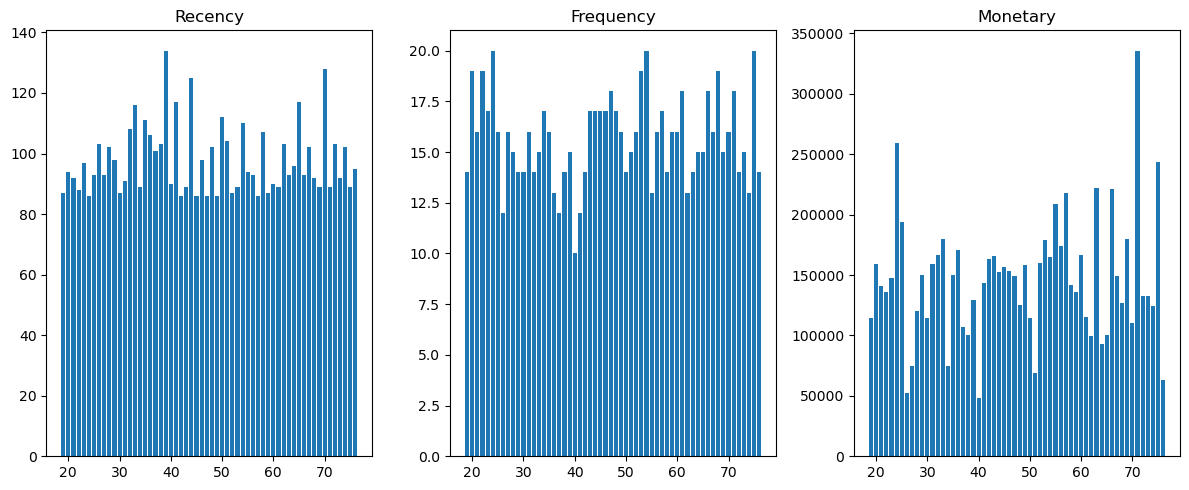

In [154]:


# Recency
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.bar(rfm_table.index, rfm_table['Recency'])
plt.title('Recency')

# Frequency
plt.subplot(1, 3, 2)
plt.bar(rfm_table.index, rfm_table['Frequency'])
plt.title('Frequency')

# Monetary
plt.subplot(1, 3, 3)
plt.bar(rfm_table.index, rfm_table['Monetary'])
plt.title('Monetary')

plt.tight_layout()
plt.show()


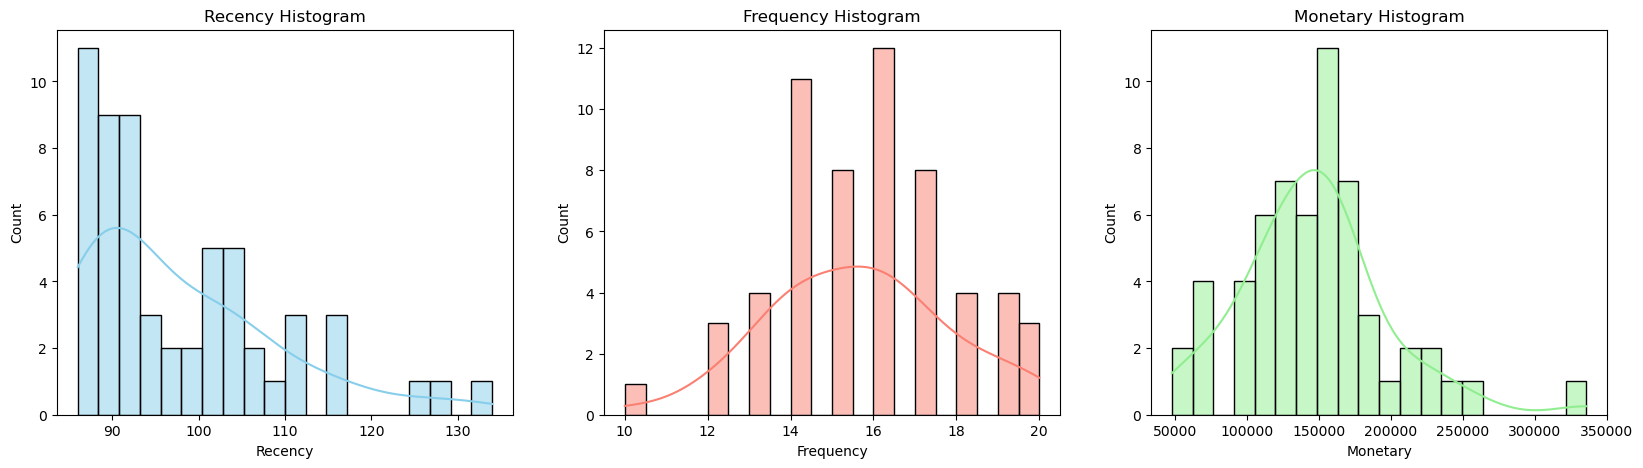

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recency histogramı
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm_table['Recency'], bins=20, kde=True, color='skyblue')
plt.title('Recency Histogram')

# Frequency histogramı
plt.subplot(1, 3, 2)
sns.histplot(rfm_table['Frequency'], bins=20, kde=True, color='salmon')
plt.title('Frequency Histogram')

# Monetary histogramı
plt.subplot(1, 3, 3)
sns.histplot(rfm_table['Monetary'], bins=20, kde=True, color='lightgreen')
plt.title('Monetary Histogram')

plt.show()


In [65]:
#RFM Score hesaplanması

rfm_table["Recency_score"] = pd.qcut(rfm_table['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_table["Frequency_score"] = pd.qcut(rfm_table['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_table["Monetary_score"] = pd.qcut(rfm_table['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm_table["RFM_SCORE"] = (rfm_table['Recency_score'].astype(str) + rfm_table['Frequency_score'].astype(str) + rfm_table['Monetary_score'].astype(str))

rfm_table.head(10)

,Monetary,Recency,Frequency,Recency_score,Frequency_score,Monetary_score,RFM_SCORE
Yas,,,,,,,
19,114037.66,87,14,5,1,2,512
20,158783.12,94,19,3,5,4,354
21,140795.00,92,16,4,3,3,433
22,135655.64,88,19,5,5,3,553
23,147207.33,97,17,3,4,3,343
24,258899.47,86,20,5,5,5,555
25,193505.45,93,16,3,3,5,335
26,52061.06,103,12,2,1,1,211
27,74889.72,93,16,3,3,1,331


In [66]:
rfm_table.groupby('RFM_SCORE').size().sort_values(ascending = False)[:5]

RFM_SCORE
555    5
211    3
221    2
553    2
544    2
dtype: int64

In [67]:
#İçerikleri incelemek istersek
rfm_table.groupby('RFM_SCORE').agg({
    'Recency': ['mean', 'max', 'count'],
    'Frequency': ['mean', 'max', 'count'],
    'Monetary': ['mean', 'max', 'count']
}).round(1).head()

Recency            Frequency            Monetary                
             mean  max count      mean max count      mean       max count
RFM_SCORE                                                                 
113         117.0  117     1      12.0  12     1  143090.1  143090.1     1
114         107.0  108     2      13.5  14     2  168526.2  170784.2     2
122         123.0  134     2      14.5  15     2  121839.0  128970.9     2
123         107.0  107     1      14.0  14     1  141519.9  141519.9     1
125         116.0  116     1      15.0  15     1  179872.5  179872.5     1

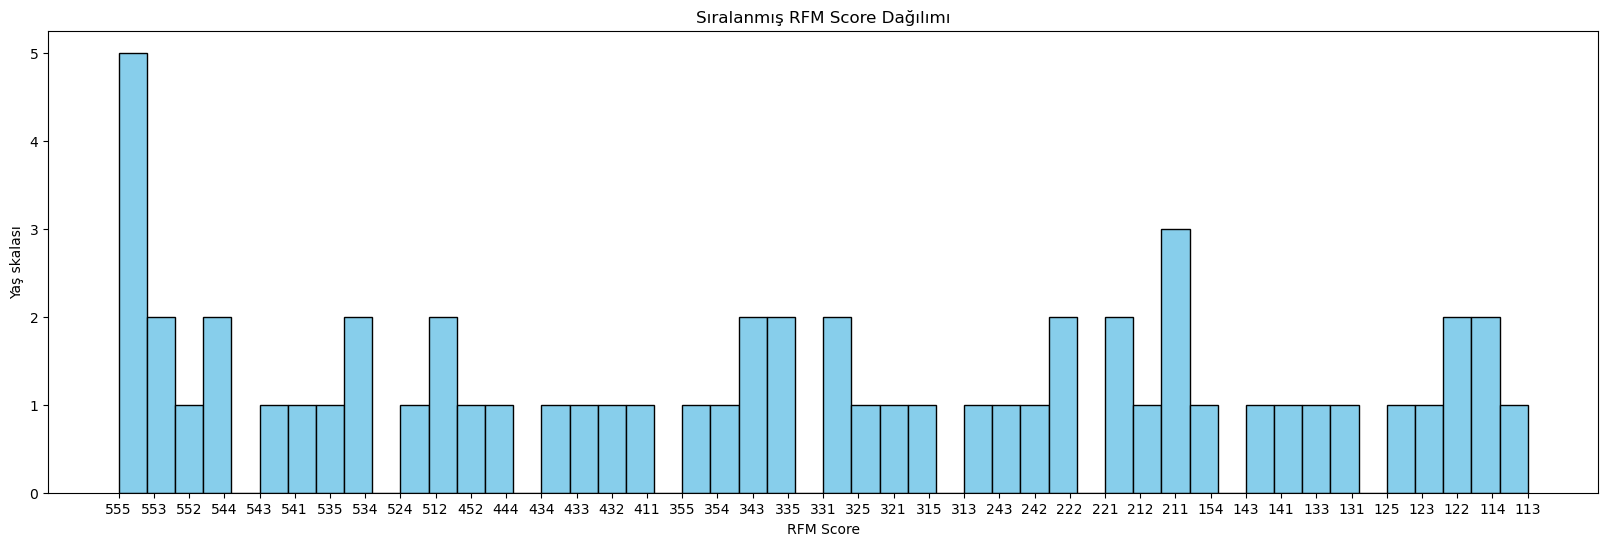

In [68]:
plt.figure(figsize=(20, 6))
sorted_rfm_scores = rfm_table['RFM_SCORE'].sort_values(ascending=False)
plt.hist(sorted_rfm_scores, bins=50, color='skyblue', edgecolor='black')
plt.title('Sıralanmış RFM Score Dağılımı')
plt.xlabel('RFM Score')
plt.ylabel('Yaş skalası')
plt.show()


------
## 6- K-Means Kümeleme Algoritması

In [86]:
clus = rfm_table[['Monetary', 'Recency', 'Frequency']]

In [124]:
clusterdata = rfm_table.iloc[:,0:3]
clusterdata.head()

,Monetary,Recency,Frequency
Yas,,,
19,114037.66,87,14
20,158783.12,94,19
21,140795.00,92,16
22,135655.64,88,19
23,147207.33,97,17


In [108]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clusterdata)
data_scaled2 = pd.DataFrame(x_scaled)

data_scaled2.head()

,0,1,2
0,0.229565,0.020833,0.4
1,0.385075,0.166667,0.9
2,0.322558,0.125000,0.6
3,0.304697,0.041667,0.9
4,0.344844,0.229167,0.7


In [109]:
data_scaled2.describe()

,0,1,2
count,58.000000,58.000000,58.000000
mean,0.342175,0.246767,0.565517
std,0.177541,0.237434,0.218890
min,0.000000,0.000000,0.000000
25%,0.232260,0.062500,0.400000
50%,0.348133,0.156250,0.600000
75%,0.410416,0.354167,0.700000
max,1.000000,1.000000,1.000000


In [110]:
?KMeans

C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

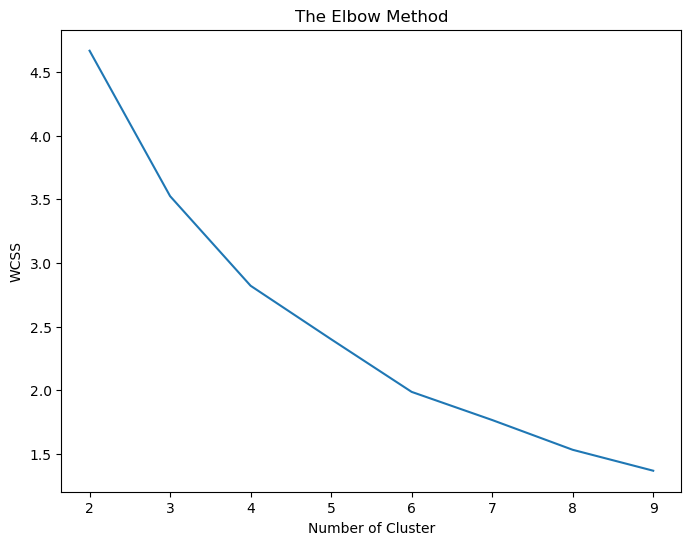

In [111]:
plt.figure(figsize=(8,6))
wcss = []
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, max_iter= 200)
    kmeans.fit(data_scaled2)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

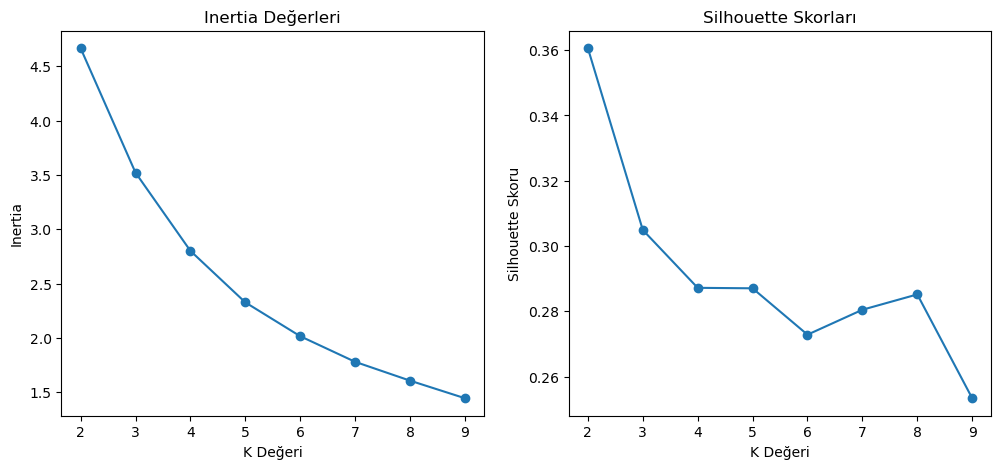

In [112]:
from sklearn.metrics import silhouette_score

# Inertia ve Silhouette skorlarını gösteren çizim
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Inertia ve Silhouette skorlarını depolamak için boş listeler oluşturun
inertia_list = []
silhouette_score_list = []

# K değerlerini 2 ila 9 arasında değiştirerek deneyin
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled2)
    
    # Her bir k değeri için inertia değerini listeye ekleyin
    inertia_list.append(kmeans.inertia_)
    
    # Her bir k değeri için silhouette skorunu listeye ekleyin
    silhouette_score_list.append(silhouette_score(data_scaled2, kmeans.labels_))

# Inertia değerlerini çizimle gösterin
ax1.plot(range(2, 10), inertia_list, marker='o')
ax1.set_title('Inertia Değerleri')
ax1.set_xlabel('K Değeri')
ax1.set_ylabel('Inertia')

# Silhouette skorlarını çizimle gösterin
ax2.plot(range(2, 10), silhouette_score_list, marker='o')
ax2.set_title('Silhouette Skorları')
ax2.set_xlabel('K Değeri')
ax2.set_ylabel('Silhouette Skoru')

plt.show()


In [114]:
#K-Means using 5 clusters and k-means++ init
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=5, max_iter=200)
kmeans.fit(data_scaled2)
pred = kmeans.predict(data_scaled2)

C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [115]:
pred = kmeans.predict(data_scaled2)

In [116]:
#kümelerin içerdiği yaş gruplarının sayısı

clusterdata = rfm_table.iloc[:,1:4]
d_frame = pd.DataFrame(rfm_table)
d_frame['cluster'] = pred
d_frame['cluster'].value_counts()

cluster
3    24
2    14
0    11
1     9
Name: count, dtype: int64

In [117]:
d_frame.head()

,Monetary,Recency,Frequency,Recency_score,Frequency_score,Monetary_score,RFM_SCORE,cluster
Yas,,,,,,,,
19,114037.66,87,14,5,1,2,512,3
20,158783.12,94,19,3,5,4,354,0
21,140795.00,92,16,4,3,3,433,3
22,135655.64,88,19,5,5,3,553,0
23,147207.33,97,17,3,4,3,343,3


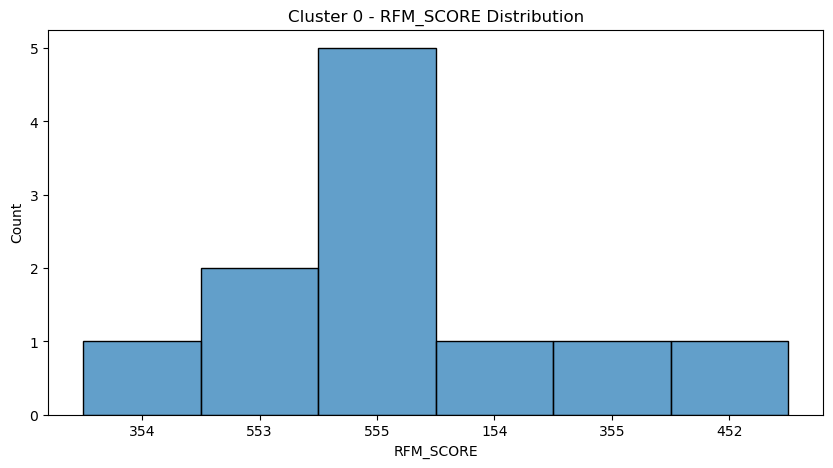

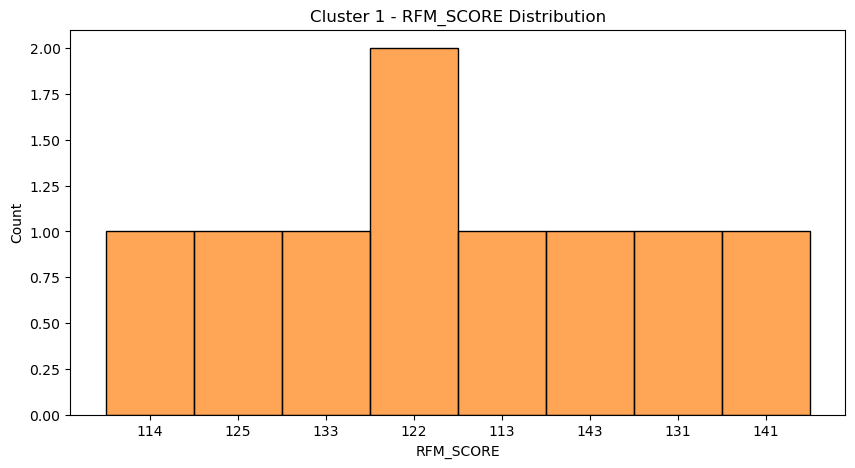

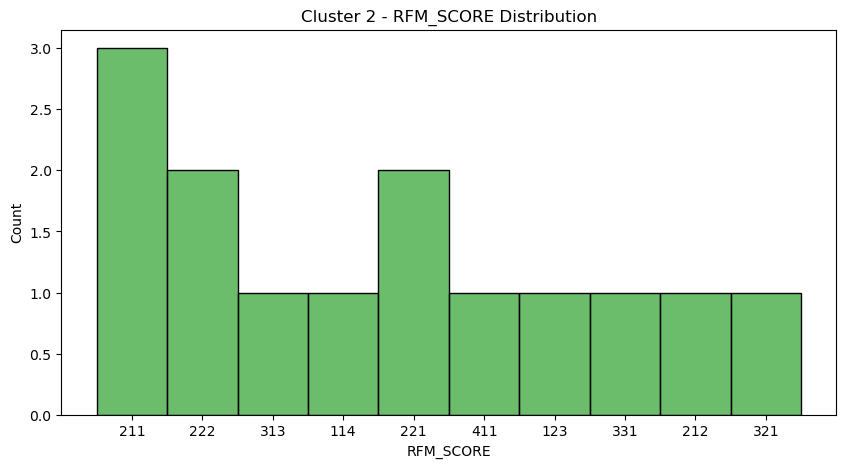

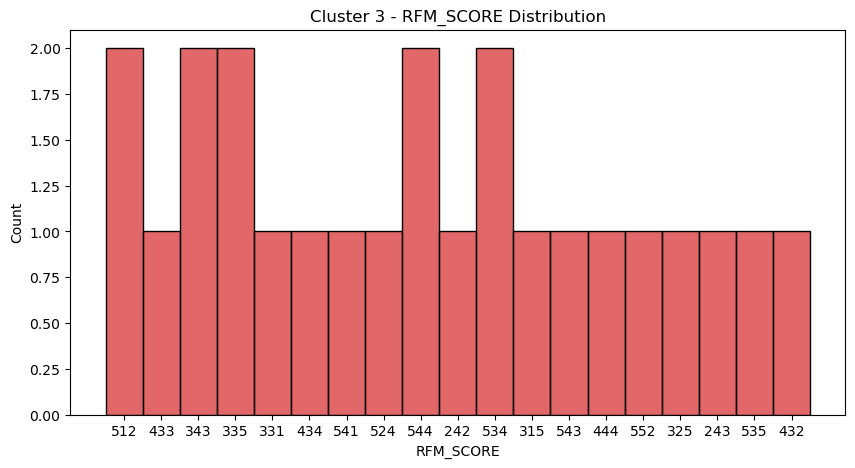

In [118]:
# Her bir küme için RFM_SCORE değerlerini içeren DataFrame
cluster_rfm_scores = d_frame.groupby('cluster')['RFM_SCORE'].apply(list).reset_index()
cluster_rfm_scores.columns = ['Cluster', 'RFM_SCOREs']

# Her bir küme için ayrı ayrı bar plot çizimi
for index, row in cluster_rfm_scores.iterrows():
    plt.figure(figsize=(10, 5))
    sns.histplot(row['RFM_SCOREs'], bins=range(1, 12), kde=False, color=f'C{row["Cluster"]}', alpha=0.7)
    plt.title(f'Cluster {int(row["Cluster"])} - RFM_SCORE Distribution')
    plt.xlabel('RFM_SCORE')
    plt.ylabel('Count')
    plt.show()


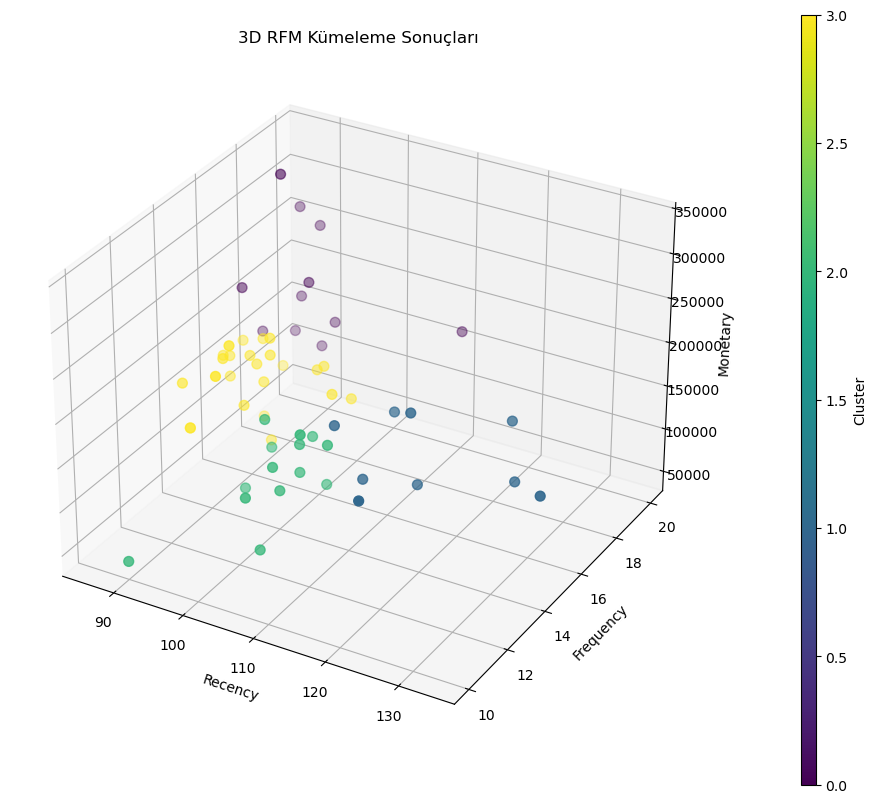

In [119]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Kümeleme sonuçlarına göre renklendirilmiş 3D scatter plot
scatter = ax.scatter(d_frame['Recency'], d_frame['Frequency'], d_frame['Monetary'], c=d_frame['cluster'], cmap='viridis', s=50)  # s parametresi noktaların büyüklüğünü kontrol eder
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D RFM Kümeleme Sonuçları')

# Renk skalasını ekleme
legend1 = fig.colorbar(scatter, ax=ax, pad=0.1, aspect=50)
legend1.set_label('Cluster')

plt.show()


C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\onura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


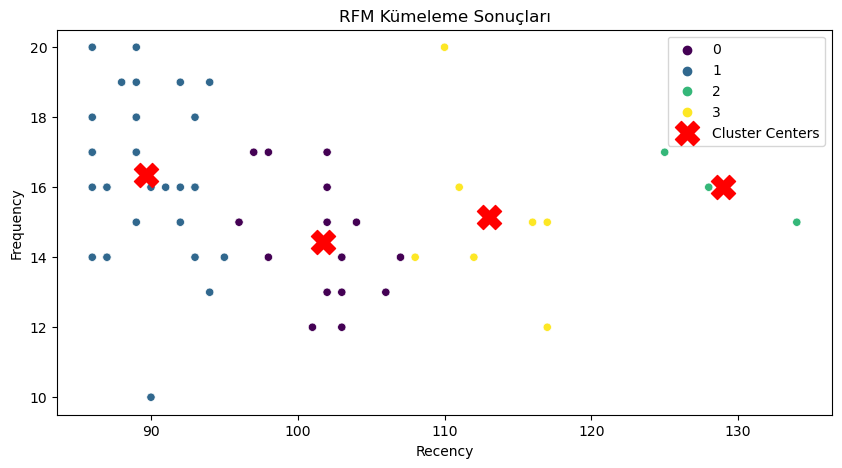

In [120]:
# Önce KMeans modelini oluşturun
num_clusters = 4  # Küme sayısını belirtin
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(d_frame[['Recency', 'Frequency']])  # X, veri setinizin uygun özelliklerini içermelidir

# Kümeleri tahmin etme
d_frame['cluster'] = kmeans.predict(d_frame[['Recency', 'Frequency']])

# Daha sonra scatter plot üzerinde gösterim için kullanın
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Recency', y='Frequency', hue='cluster', data=d_frame, palette='viridis')

# Küme merkezlerini çıkartma
cluster_centers = kmeans.cluster_centers_

# Küme merkezlerini scatter plot üzerine ekleyerek gösterme
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=300, c='red', label='Cluster Centers', alpha=1)

plt.title('RFM Kümeleme Sonuçları')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [121]:
# İlk olarak, istediğin sınıfların verilerini seçelim
selected_clusters = [0, 1, 2, 3, 4]
selected_data = d_frame[d_frame['cluster'].isin(selected_clusters)]

# Ardından, her bir sınıfa ait Recency, Frequency ve Monetary değerlerini içeren bir tablo oluşturalım
cluster_stats = selected_data.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Tabloyu ekrana bastıralım
print(cluster_stats)


   cluster   Recency  Frequency       Monetary
0        0  101.6875  14.437500  120978.257500
1        1   89.6875  16.343750  160843.368438
2        2  129.0000  16.000000  130633.623333
3        3  113.0000  15.142857  145564.651429


## 6.1 Sonuç ve yorum (K-Means)

## Küme-0 : 
Yüksek Monetary değeri ve normal alışveriş sıklığına sahip bu yaş değerleri 113 gün önce alışveriş yaptıkları için bu yaşlardaki müşteriler orta segment müşteriler olarak değerlendirilir.

## Küme-1 : 
En yüksek Monetary değeri ve normal alışveriş sıklığına sahip bu yaş değerleri en son işlem yapan müşterilere aittir. Bu yüzden üst segment müşteriler olarak değerlendirilir.

## Küme-2 : 
Düşük Monetary değeri ve en yüksek alışveriş sıklığına sahip bu yaş değerleri uzun süredir alışveriş yapmadıkları gözlemlenmiştir.Fakat geri kazanıldığı takdirde üst segment müşteri olabilirler.

## Küme-3 : 
Düşük Monetary değeri ve en az alışveriş sıklığına sahip yaş değerleridir. Bu yüzden alt segment müşteriler olarak değerlendirilir.



-----------------------------------

------
## 7- Mean-Shift Kümeleme Algoritması

In [135]:
clusterdata_1 = rfm_table.iloc[:,0:3]
clusterdata_1.head()

,Monetary,Recency,Frequency
Yas,,,
19,114037.66,87,14
20,158783.12,94,19
21,140795.00,92,16
22,135655.64,88,19
23,147207.33,97,17


In [136]:
from sklearn.cluster import MeanShift

# MeanShift modelini oluşturulması
mean_shift = MeanShift()

# Modeli veri setine uygulayın
mean_shift.fit(clusterdata)

# Küme merkezlerini ve etiketleri alın
cluster_centers = mean_shift.cluster_centers_
labels = mean_shift.labels_

# Etiketleri ve merkezleri veri setine ekleyin
clusterdata['cluster_label'] = labels

# Küme merkezlerini ve kümelere ayrılmış veri setini görüntüleyin
print("Küme merkezleri:\n", cluster_centers)
print("\nKümelenmiş veri seti:\n", clusterdata.head())

# Kümeleme sonuçlarını görselleştirme
if clusterdata.shape[1] == 2:
    
    plt.scatter(clusterdata.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=100, alpha=0.5) # Küme merkezleri
    plt.title('Mean-shift Kümeleme Sonuçları')
    plt.show()


Küme merkezleri:
 [[1.52167494e+05 9.85757576e+01 1.60000000e+01 0.00000000e+00]
 [6.77899371e+04 9.57142857e+01 1.41428571e+01 1.00000000e+00]
 [2.17798990e+05 9.13333333e+01 1.63333333e+01 2.00000000e+00]
 [3.35718050e+05 8.90000000e+01 1.80000000e+01 3.00000000e+00]]

Kümelenmiş veri seti:
       Monetary  Recency  Frequency  cluster_label
Yas                                              
19   114037.66       87         14              0
20   158783.12       94         19              0
21   140795.00       92         16              0
22   135655.64       88         19              0
23   147207.33       97         17              0


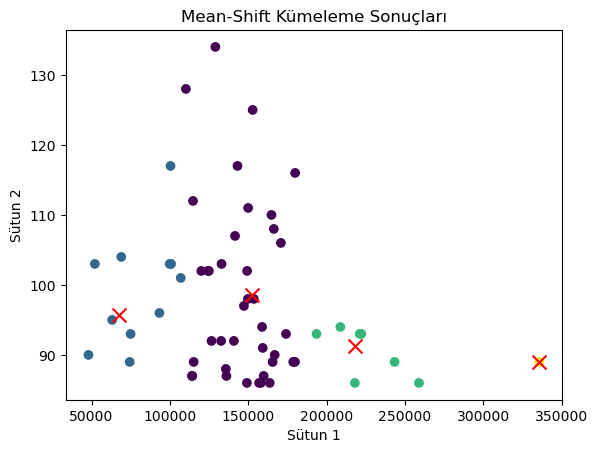

In [137]:
# Veri noktalarını çizdirme
plt.scatter(clusterdata.iloc[:, 0], clusterdata.iloc[:, 1], c=labels, cmap='viridis', marker='o')

# Küme merkezlerini çizdirme
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)

plt.title('Mean-Shift Kümeleme Sonuçları')
plt.xlabel('Sütun 1')
plt.ylabel('Sütun 2')
plt.show()


In [138]:
# Her bir küme için 'Recency', 'Frequency', ve 'Monetary' sütunlarının ortalamasını hesaplayın
cluster_summary = clusterdata.groupby('cluster_label')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# Sonucu yazdırın
print(cluster_summary)


   cluster_label    Recency  Frequency       Monetary
0              0  98.923077  15.871795  146404.287692
1              1  99.454545  13.909091   80210.423636
2              2  90.571429  16.857143  223670.487143
3              3  89.000000  18.000000  335718.050000


## 7.1 Sonuç ve yorum (Mean-Shift)

## Küme-0 : 
Küme 0 da bulunan müşterilerin yüksek getiri değeri ve normal alışveriş sıklığına sahip müşteriler olduğu söylenebilir. Uzun süredir de alışveriş yapmamışlar.

## Küme-1 : 
Küme 1 de bulunan müşteriler en düşük getiri değeri ve düşük alışveriş sıklığına sahiptir. Bu yaştaki müşteriler diğer müşterilere nazaran uzun süredir alışveriş yapmadıkları gözlemlendi.

## Küme-2 : 
Küme 2 de bulunan müşteriler oldukça yüksek getiri değeri ve yüksek alışveriş sıklığına sahiptir.

## Küme-3 : 
Bu kümede bulunan müşteriler ise en yüksek getiri değerine sahip ve en yüksek alışveriş sıklığına sahip müşterilerdir.



-----------------------------------

------
## 8- Hiyerarşik Kümeleme Algoritması

In [139]:
clusterdata_2 = rfm_table.iloc[:,0:3]
clusterdata_2.head()

,Monetary,Recency,Frequency
Yas,,,
19,114037.66,87,14
20,158783.12,94,19
21,140795.00,92,16
22,135655.64,88,19
23,147207.33,97,17


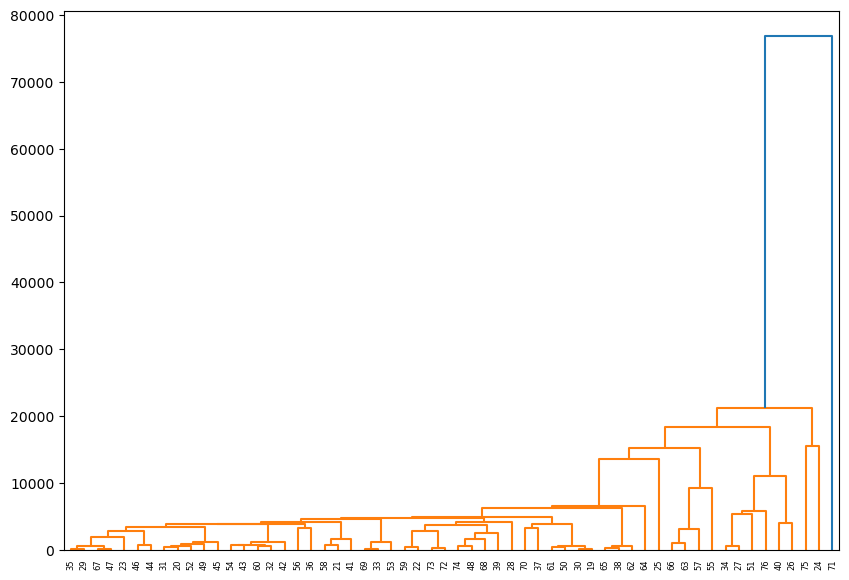

In [143]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hiyerarşik kümelemeyi gerçekleştirin
linked = linkage(clusterdata_2, 'single')  # 'single' en yakın komşu yöntemidir.

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=clusterdata_2.index,
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()  # Dendrogramı göster


In [153]:
from scipy.cluster.hierarchy import fcluster

# Dendrogram üzerinde bir kesme yüksekliği belirleyin
# 'max_d' mesafeye göre küme sayısını belirler
max_d = 17500  # Bu değer dendrogramınıza göre ayarlanmalıdır

# Kesme yüksekliğine göre kümeleri alın
clusters = fcluster(linked, max_d, criterion='distance')

# Her veri noktasının ait olduğu kümeyi veri setine ekleyin
clusterdata_2['cluster'] = clusters

# Kümeleri inceleyin
print(clusterdata_2.groupby('cluster').mean())  # Her bir kümenin ortalamasını alabilirsiniz

# İsterseniz her bir kümenin boyutunu da inceleyebilirsiniz
print(clusterdata_2['cluster'].value_counts())


              Monetary    Recency  Frequency
cluster                                     
1        251114.055000  87.500000  20.000000
2         63544.975000  95.666667  14.000000
3        148454.639388  98.714286  15.632653
4        335718.050000  89.000000  18.000000
cluster
3    49
2     6
1     2
4     1
Name: count, dtype: int64


## 8.1 Sonuç ve yorum (Hiyerarşik Kümeleme)

## Küme-1 : 
Küme 1 da bulunan müşterilerin yüksek getiri değeri ve en yüksek alışveriş sıklığına sahip müşteriler olduğu söylenebilir. En son işlem yapan müşterilerdir.

## Küme-2 : 
Küme 2 de bulunan müşteriler en düşük getiri değeri ve en düşük alışveriş sıklığına sahiptir. En son işlem tarihi de pek yeni sayılmaz.

## Küme-3 : 
Küme 3 de bulunan müşteriler düşük getiri değeri ve düşük alışveriş sıklığına sahiptir. Uzun süredir işlem yapmadıkları gözlemlenmiştir.

## Küme-4 : 
Bu kümede bulunan müşteriler ise en yüksek getiri değerine sahip ve yüksek alışveriş sıklığına sahip müşterilerdir.

